In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [3]:
df = pd.read_csv('../data/loan_approval_dataset.csv')
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

# Data Preprocessing

## Check for nan values

In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Check Dtypes and column names

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# remove the space in the column name
df.columns = df.columns.str.replace(' ','')


In [7]:
# update the type of columns
cols = ['education', 'self_employed', 'loan_status']

for col in cols:
    df[col] = df[col].astype('string')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   string
 3   self_employed             4269 non-null   string
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   string
dtypes: int64(10), string(3)
memory usage: 433.7 KB


## Describe

In [9]:
df.describe().T

count          mean           std       min  \
loan_id                   4269.0  2.135000e+03  1.232498e+03       1.0   
no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                25%         50%         75%         max  
loan_id                      1068.0      2135.0      3202.0      4269.0  
no_of_dependents                1.0         3.0         4.0         5.0  
income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
loan_term                       6.0        10.0        16.0        20.0  
cibil_score                   453.0       600.0       748.0       900.0  
residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

# EDA

- How big is the DataFrame (shape)
- Which is the biggest annual income?
- Which is the smallest annual income?
- Which is the highest cibil score?
- Which is the smallest cibil score
- How many loan term?

In [10]:
# checking duplicates
df_d = df.copy()
df_d.shape

(4269, 13)

In [11]:
df_d.drop_duplicates()
df_d.shape

(4269, 13)

In [12]:
del df_d

<function matplotlib.pyplot.show(close=None, block=None)>

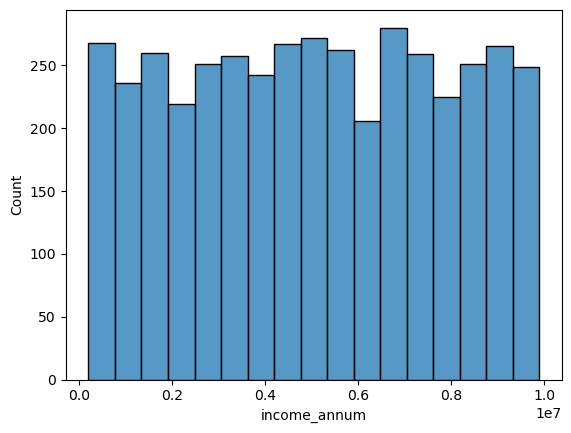

In [13]:
# Histogram
sns.histplot(x='income_annum', data=df)
plt.show

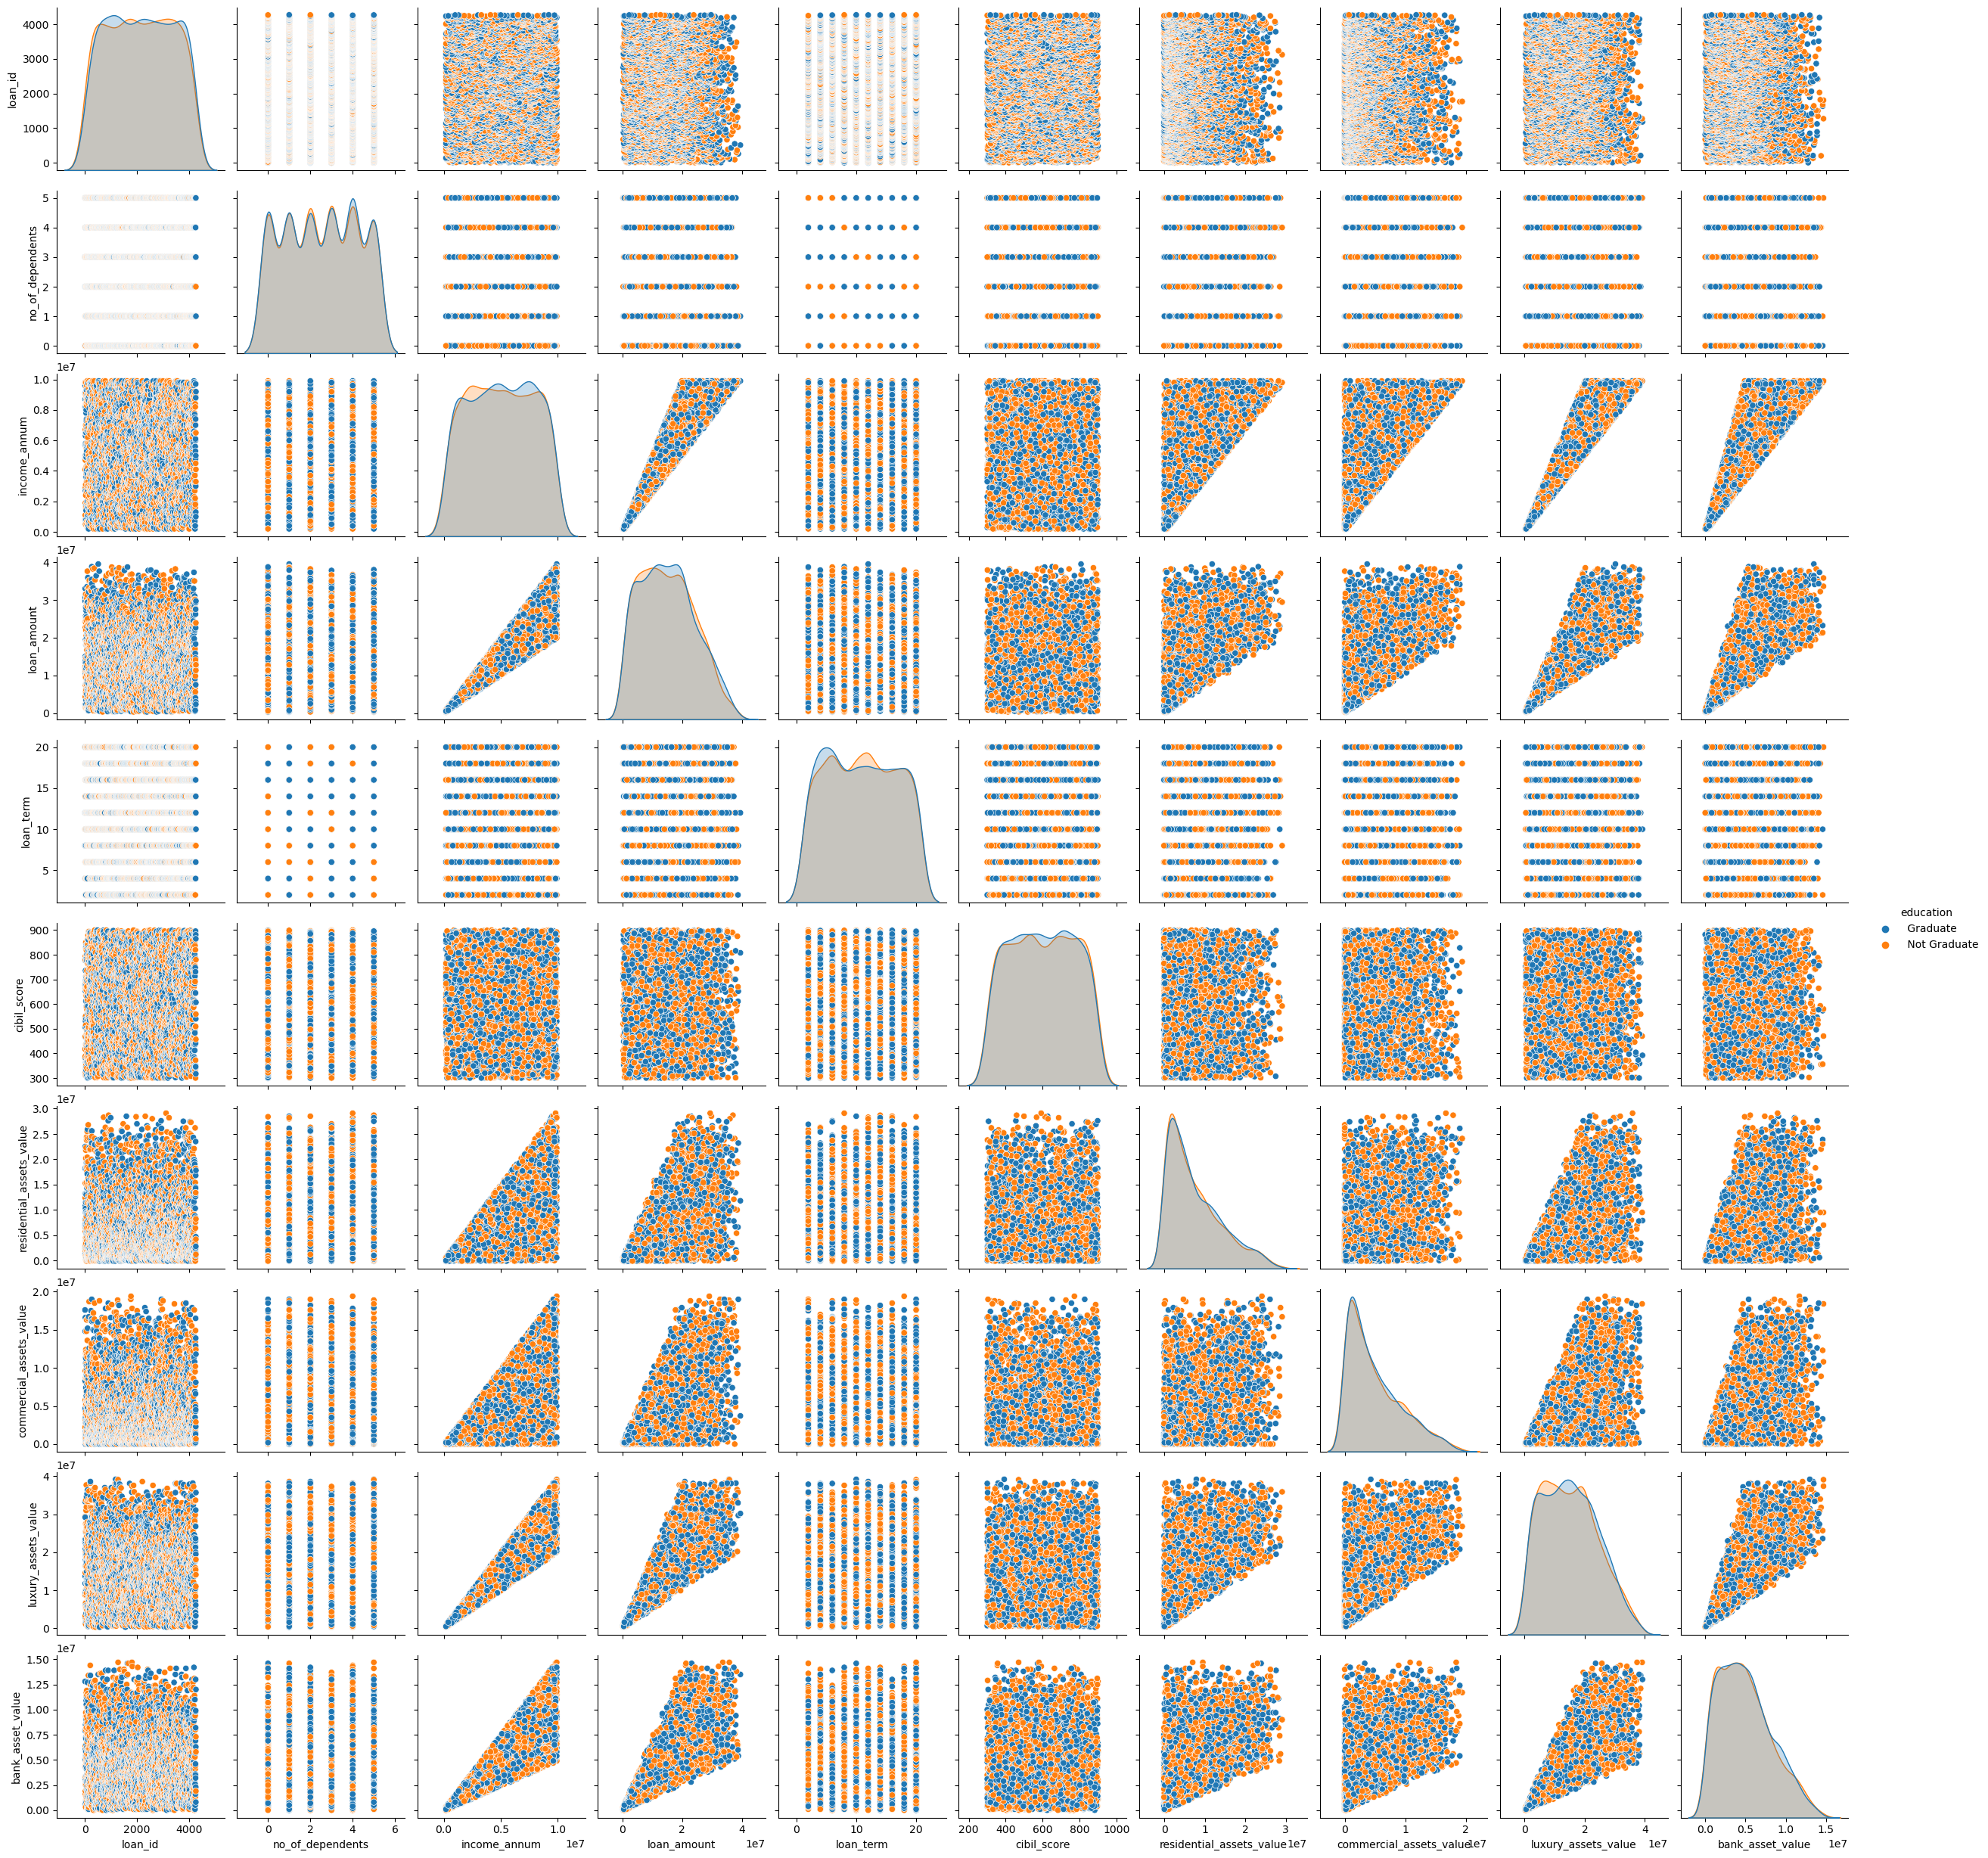

In [14]:
sns.pairplot(data=df, hue='education')

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

<Axes: >

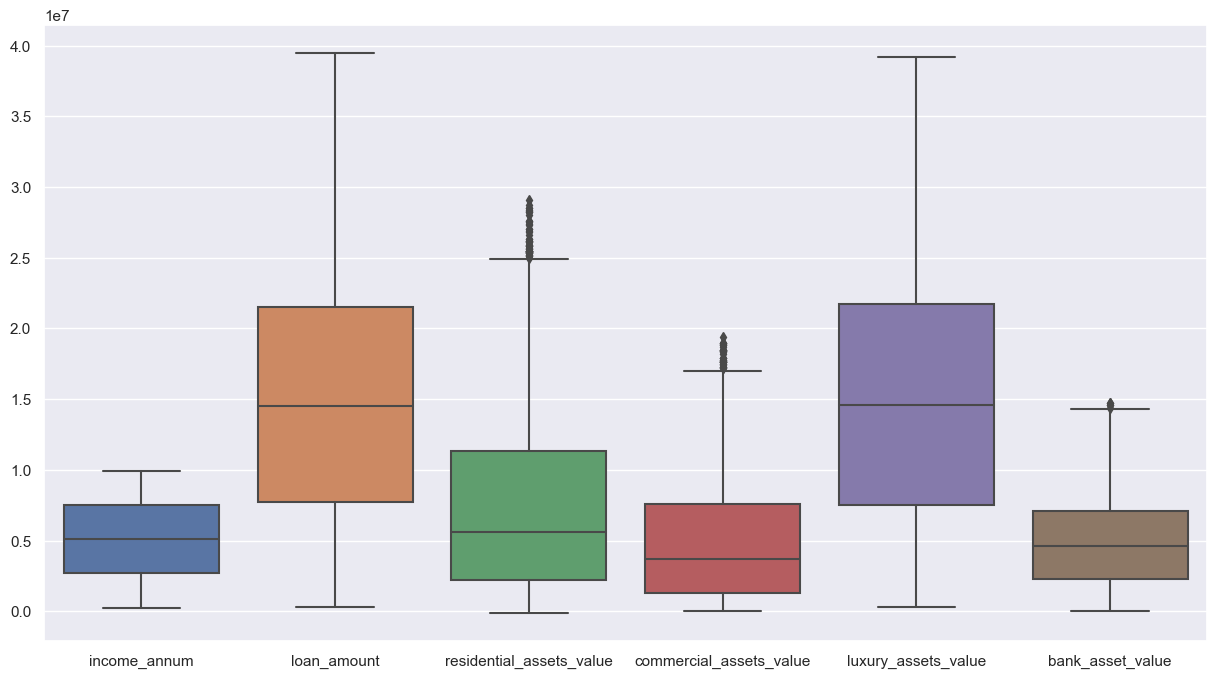

In [28]:
# Outliers
sns.set(rc={'figure.figsize':(15,8)})
sns.boxplot(df[['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']] )

In [31]:
df[df['residential_assets_value'] > 25000000]

loan_id  no_of_dependents      education self_employed  income_annum  \
82         83                 2   Not Graduate           Yes       9900000   
98         99                 4       Graduate            No       9400000   
123       124                 0   Not Graduate           Yes       9000000   
228       229                 1   Not Graduate           Yes       8700000   
262       263                 3       Graduate            No       9200000   
693       694                 0       Graduate            No       9200000   
714       715                 4   Not Graduate            No       9900000   
781       782                 3   Not Graduate           Yes       9900000   
892       893                 4       Graduate            No       9300000   
905       906                 5   Not Graduate            No       9700000   
919       920                 0   Not Graduate           Yes       8800000   
924       925                 0   Not Graduate           Yes       8600000   
953       954                 5       Graduate           Yes       8700000   
956       957                 0   Not Graduate           Yes       9100000   
987       988                 5       Graduate            No       9400000   
997       998                 3   Not Graduate           Yes       8500000   
1002     1003                 5   Not Graduate            No       9600000   
1397     1398                 1   Not Graduate           Yes       9200000   
1419     1420                 2       Graduate            No       9100000   
1468     1469                 3   Not Graduate           Yes       9500000   
1591     1592                 1       Graduate            No       9500000   
1625     1626                 2   Not Graduate           Yes       9900000   
1965     1966                 0   Not Graduate            No       9900000   
1997     1998                 0       Graduate            No       9300000   
2185     2186                 2       Graduate           Yes       9200000   
2318     2319                 2   Not Graduate           Yes       9600000   
2384     2385                 3       Graduate           Yes       9100000   
2412     2413                 4   Not Graduate            No       9700000   
2586     2587                 1   Not Graduate           Yes       9800000   
2715     2716                 4       Graduate           Yes       9100000   
2818     2819                 1   Not Graduate           Yes       9500000   
2828     2829                 4       Graduate           Yes       9200000   
2922     2923                 0   Not Graduate           Yes       9600000   
2927     2928                 4       Graduate            No       9400000   
2930     2931                 3   Not Graduate            No       8700000   
2940     2941                 1       Graduate           Yes       9600000   
3119     3120                 4   Not Graduate            No       9800000   
3157     3158                 0   Not Graduate           Yes       8600000   
3234     3235                 1   Not Graduate            No       9900000   
3310     3311                 5   Not Graduate            No       8500000   
3498     3499                 2       Graduate           Yes       9100000   
3631     3632                 3       Graduate            No       9800000   
3763     3764                 3       Graduate            No       9600000   
3782     3783                 5       Graduate           Yes       9500000   
3868     3869                 5   Not Graduate            No       9600000   
3872     3873                 0       Graduate            No       8800000   
3880     3881                 3   Not Graduate            No       9100000   
4027     4028                 1   Not Graduate            No       9100000   
4042     4043                 4       Graduate            No       9300000   
4074     4075                 4   Not Graduate           Yes       9400000   
4237     4238               

In [ ]:
# removing outliers

In [33]:
# remove the space at the beginning of the loan_status value
df['loan_status'] = df['loan_status'].str.replace(" ","")

In [34]:
# add new column named approval_status based on the loan_status
# the idea is to find the relationship between loan_status and other features
df['approval_status'] = np.where(df['loan_status'] == 'Approved', 1, 0)

In [35]:
# checking value of approval_status
df['approval_status']

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: approval_status, Length: 4269, dtype: int32

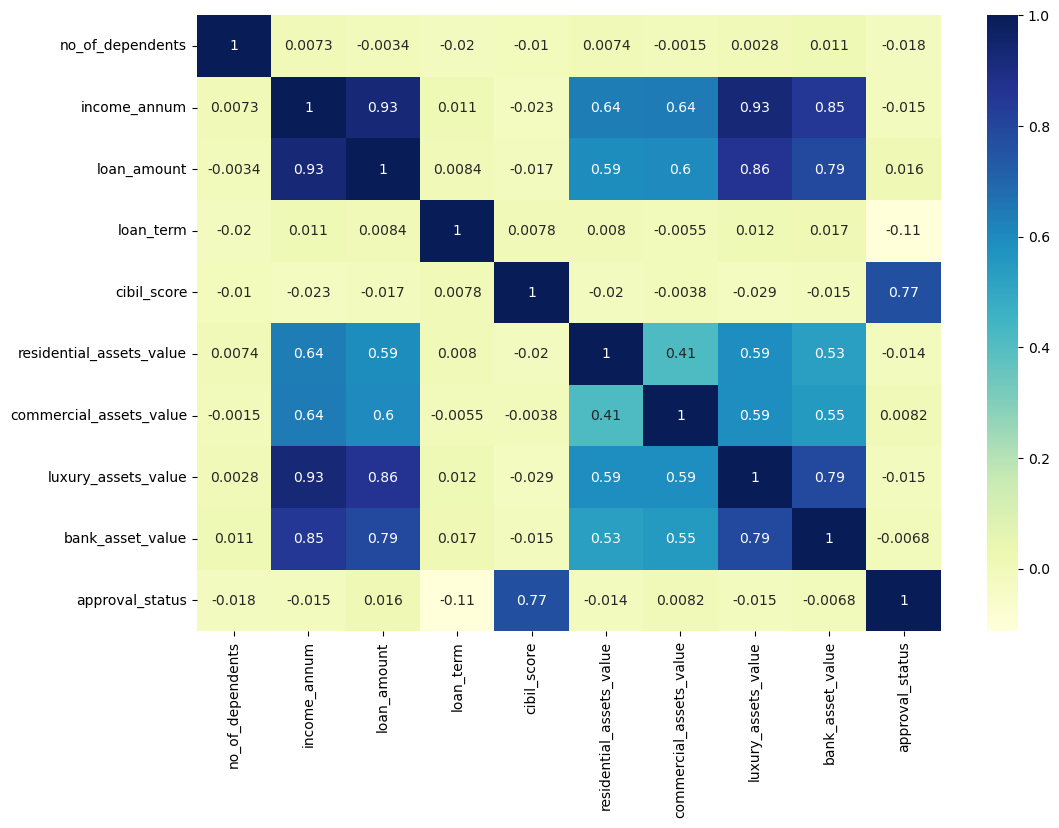

In [104]:
# using heat map to check the correlation between features
corr = df.loc[:, ~df.columns.isin(['loan_id', 'education','self_employed', 'loan_status'])].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.show()

In [86]:
df.to_csv('../output/loan_approval_cleaned_data.csv')

Testing the relationship between
- income_annum and loan_amount
- cibil_score and loan_status
- education and loan_status

Hypothesis testing 

Cibil Score has statistic significantly impact to the loan_status

In [100]:
import scipy.stats as st


In [79]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'approval_status'],
      dtype='object')

T-Test

Text(0.5, 1.0, 'Approval status by Cibil score')

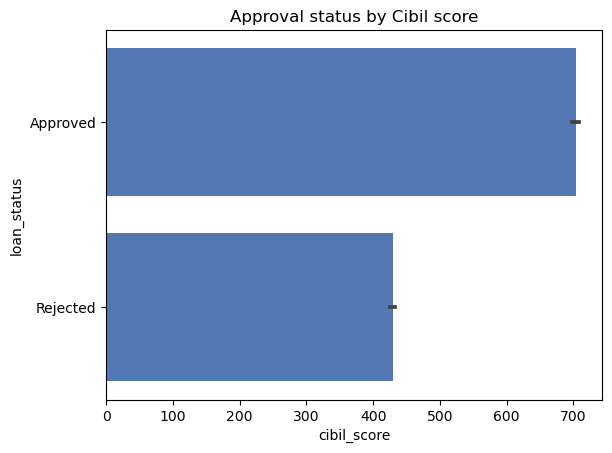

In [85]:
import seaborn as sns
ax = sns.barplot(data=df, x='cibil_score', y='loan_status', color='#4473C5')
ax.set_title('Approval status by Cibil score')

ANOVA test

In [87]:
df_approved = df[df['loan_status'] == 'Approved']['cibil_score']
df_approved

0       778
6       678
8       782
10      547
13      679
       ... 
4261    881
4263    865
4265    559
4267    780
4268    607
Name: cibil_score, Length: 2656, dtype: int64

In [88]:
df_rejected = df[df['loan_status'] == 'Rejected']['cibil_score']

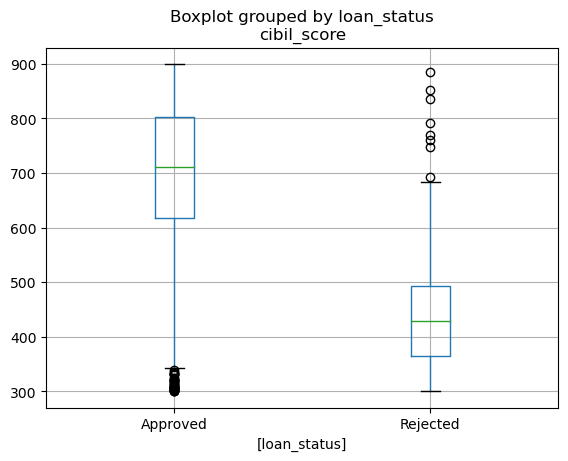

In [89]:
df[['cibil_score', 'loan_status']].boxplot(by='loan_status')
plt.show()

Chi-Squared Test: for testing the relationship between two categorical variables
* hypothesis
-   null hypothesis: "education" and "loan_status" are independant to each other
-   alternative hypothesis: "education" and "loan_status" are dependant to each other

In [90]:
ed_loan = pd.crosstab(df['education'], df['loan_status'])
ed_loan

loan_status   Approved  Rejected
education                       
Graduate          1339       805
Not Graduate      1317       808

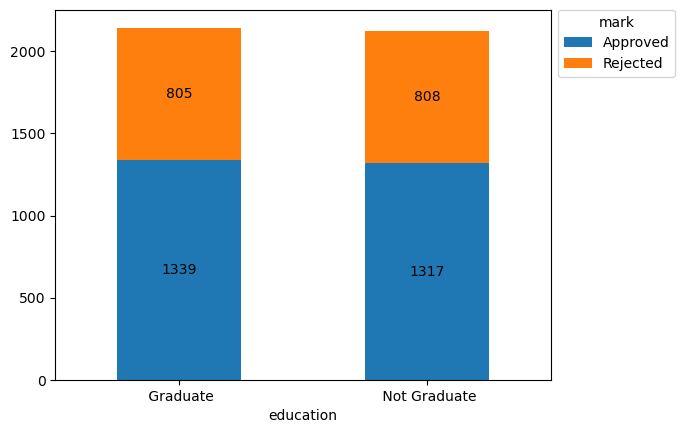

In [92]:
ax = ed_loan.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    ax.bar_label(c, label_type='center')

In [101]:
st.chi2_contingency(ed_loan)

Chi2ContingencyResult(statistic=0.08395754138250573, pvalue=0.7720042291016309, dof=1, expected_freq=array([[1333.91051769,  810.08948231],
       [1322.08948231,  802.91051769]]))

Since the pvalue is 0.77 so we can't reject the Null Hypothesis which means that there is a relationship between education and loan_status

Shapiro test (for checking Normality)
H0: Distribution is normal
H1: Distribution is not normal

In [94]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'approval_status'],
      dtype='object')

In [97]:
import scipy.stats as st
st.shapiro(df.income_annum)

ShapiroResult(statistic=0.9564422965049744, pvalue=6.158479188805275e-34)

Chi2ContingencyResult(statistic=0.08395754138250573, pvalue=0.7720042291016309, dof=1, expected_freq=array([[1333.91051769,  810.08948231],
       [1322.08948231,  802.91051769]]))

## Build the model

Multiple Linear Regression

In [32]:
import statsmodels.api as sm


df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [38]:
X = df[['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y = df['loan_amount']

In [39]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3285.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:40:55   Log-Likelihood:                -70231.
No. Observations:                4269   AIC:                         1.405e+05
Df Residuals:                    4260   BIC:                         1.405e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.792e+04   2.45e+05      0.236      0.813   -4.23e+05    5.39e+05
no_of_dependents         -5.351e+04   3.05e+04     -1.753      0.080   -1.13e+05    6343.373
income_annum                 2.9727      0.063     47.447      0.000       2.850       3.096
loan_term                -3513.4551   9069.352     -0.387      0.698   -2.13e+04    1.43e+04
cibil_score                214.5227    300.325      0.714      0.475    -374.271     803.316
residential_assets_value     0.0089      0.010      0.865      0.387      -0.011       0.029
commercial_assets_value      0.0318      0.015      2.073      0.038       0.002       0.062
luxury_assets_value         -0.0058      0.015     -0.374      0.708      -0.036       0.024
bank_asset_value            -0.0118      0.030     -0.388      0.698      -0.071       0.048
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                2.698
Skew:                           0.003   Prob(JB):                        0.260
Kurtosis:                       3.123   Cond. No.                     1.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Remove the luxury_assets_value because p_value is high
X = df[['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'bank_asset_value']]
y = df['loan_amount']

In [41]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     3755.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:43:04   Log-Likelihood:                -70232.
No. Observations:                4269   AIC:                         1.405e+05
Df Residuals:                    4261   BIC:                         1.405e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.717e+04   2.45e+05      0.233      0.816   -4.24e+05    5.38e+05
no_of_dependents         -5.338e+04   3.05e+04     -1.749      0.080   -1.13e+05    6456.331
income_annum                 2.9552      0.041     71.216      0.000       2.874       3.037
loan_term                -3529.7334   9068.332     -0.389      0.697   -2.13e+04    1.42e+04
cibil_score                216.7031    300.238      0.722      0.470    -371.920     805.327
residential_assets_value     0.0089      0.010      0.867      0.386      -0.011       0.029
commercial_assets_value      0.0319      0.015      2.078      0.038       0.002       0.062
bank_asset_value            -0.0116      0.030     -0.384      0.701      -0.071       0.048
==============================================================================
Omnibus:                        2.657   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.776
Skew:                           0.004   Prob(JB):                        0.250
Kurtosis:                       3.125   Cond. No.                     6.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Remove the luxury_assets_value because p_value is high
X = df[['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value']]
y = df['loan_amount']

In [43]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     4381.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:45:33   Log-Likelihood:                -70232.
No. Observations:                4269   AIC:                         1.405e+05
Df Residuals:                    4262   BIC:                         1.405e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     5.862e+04   2.45e+05      0.239      0.811   -4.22e+05    5.39e+05
no_of_dependents          -5.35e+04   3.05e+04     -1.753      0.080   -1.13e+05    6329.455
income_annum                 2.9435      0.028    103.886      0.000       2.888       2.999
loan_term                -3579.9829   9066.480     -0.395      0.693   -2.14e+04    1.42e+04
cibil_score                215.8429    300.200      0.719      0.472    -372.705     804.391
residential_assets_value     0.0091      0.010      0.881      0.378      -0.011       0.029
commercial_assets_value      0.0319      0.015      2.075      0.038       0.002       0.062
==============================================================================
Omnibus:                        2.707   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.835
Skew:                           0.003   Prob(JB):                        0.242
Kurtosis:                       3.126   Cond. No.                     5.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Remove the loan term because p_value is high
X = df[['no_of_dependents', 'income_annum', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value']]
y = df['loan_amount']

In [45]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     5259.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:46:18   Log-Likelihood:                -70232.
No. Observations:                4269   AIC:                         1.405e+05
Df Residuals:                    4263   BIC:                         1.405e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.001e+04   2.25e+05      0.089      0.929   -4.21e+05    4.61e+05
no_of_dependents         -5.326e+04   3.05e+04     -1.746      0.081   -1.13e+05    6555.377
income_annum                 2.9433      0.028    103.904      0.000       2.888       2.999
cibil_score                214.8791    300.160      0.716      0.474    -373.591     803.349
residential_assets_value     0.0091      0.010      0.881      0.379      -0.011       0.029
commercial_assets_value      0.0320      0.015      2.082      0.037       0.002       0.062
==============================================================================
Omnibus:                        2.739   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                2.871
Skew:                           0.003   Prob(JB):                        0.238
Kurtosis:                       3.127   Cond. No.                     5.43e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
corr_df_train = df[['no_of_dependents', 'income_annum', 'cibil_score',
       'residential_assets_value']].corr()

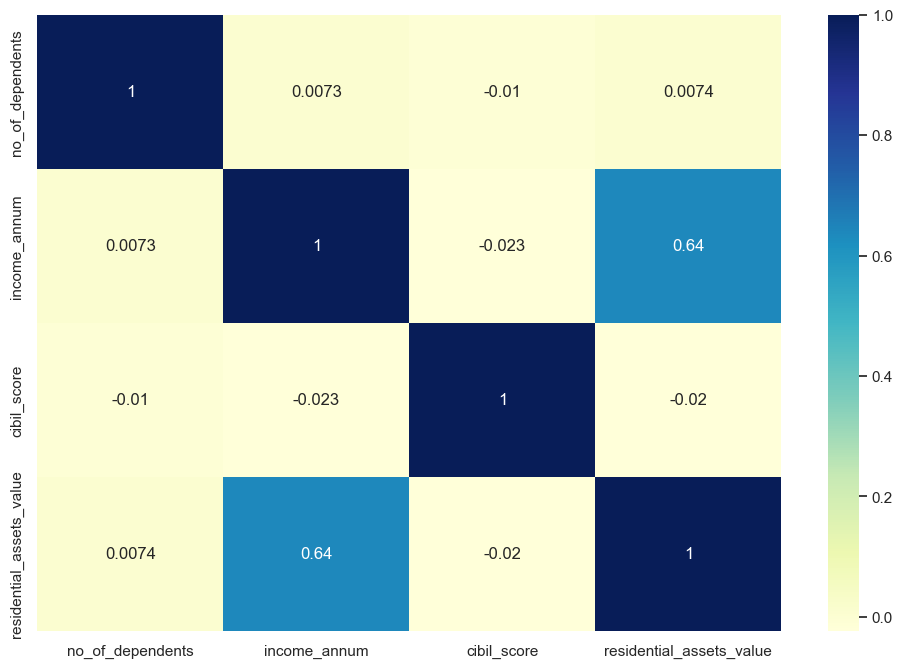

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_df_train,annot=True,cmap='YlGnBu')
plt.show()

In [49]:
# Remove the commercial assests value because multicollinery is high
X = df[['no_of_dependents', 'income_annum', 'cibil_score',
       'residential_assets_value']]
y = df['loan_amount']

In [50]:
# re-run model
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     6567.
Date:                Tue, 08 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:54:46   Log-Likelihood:                -70234.
No. Observations:                4269   AIC:                         1.405e+05
Df Residuals:                    4264   BIC:                         1.405e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.288e+04   2.25e+05      0.057      0.954   -4.28e+05    4.54e+05
no_of_dependents         -5.376e+04   3.05e+04     -1.762      0.078   -1.14e+05    6071.583
income_annum                 2.9750      0.024    124.384      0.000       2.928       3.022
cibil_score                223.8182    300.247      0.745      0.456    -364.822     812.458
residential_assets_value     0.0093      0.010      0.905      0.365      -0.011       0.030
==============================================================================
Omnibus:                        3.197   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.405
Skew:                           0.002   Prob(JB):                        0.182
Kurtosis:                       3.138   Cond. No.                     4.86e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Logistic Regression